In [141]:
import pandas as pd
import math
import json
import re
import numpy as np
import matplotlib.pyplot as plt
# import sys
from wordcloud import WordCloud
from PIL import Image
import datetime as dt


In [142]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str}, parse_dates=['created_at']
                 )


In [143]:
df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [144]:
# Filter dates
start_date = '2014-11-12'
end_date = '2014-12-06'
mask = (df['created_at'] >= start_date) & (df['created_at'] < end_date)


In [145]:
df.loc[mask]


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [146]:
type(df["created_at"])


pandas.core.series.Series

In [147]:
len(df)


77307

In [148]:
df.dtypes


id_str                                    object
from_user                                 object
text                                      object
created_at                   datetime64[ns, UTC]
geo_coordinates                           object
user_lang                                 object
in_reply_to_user_id_str                   object
in_reply_to_screen_name                   object
from_user_id_str                          object
in_reply_to_status_id_str                 object
source                                    object
profile_image_url                         object
user_followers_count                       Int64
user_friends_count                         Int64
status_url                                object
entities_str                              object
specific_applications                     object
applications                              object
dtype: object

In [149]:
df[df.duplicated()].head(20)


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications


In [150]:
df = df.drop_duplicates()
df = df.dropna(axis=0, how='all')


In [151]:
reply_df = df[["in_reply_to_user_id_str",
               "in_reply_to_screen_name", "in_reply_to_status_id_str"]]


In [152]:
reply_df


,in_reply_to_user_id_str,in_reply_to_screen_name,in_reply_to_status_id_str
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
77302,NaN,NaN,NaN
77303,NaN,NaN,NaN
77304,NaN,NaN,NaN
77305,NaN,NaN,NaN


In [153]:
# reply
def isreply(tweet):
    if not pd.isna(tweet):

        print(tweet)


In [154]:
total_replies = df[pd.notna(df["in_reply_to_user_id_str"])]  # replies


In [155]:
len(total_replies.index)  # amount of replies


1724

In [156]:
# print all replies
replies = reply_df["in_reply_to_user_id_str"].map(isreply)


11348282
19442947
253536357
253536357
64643056
33602654
1691515789
19402238
529722897
2294593507
41333964
253536357
66162716
59220577
253536357
1273487113
253536357
17842366
26030180
24129206
14526045
21436960
1969346438
253536357
253536357
2232463302
1438925534
15808765
472670056
2590415228
254659730
17384099
177594666
46959037
32520240
443080433
412396499
208442526
86070159
21436960
253536357
253536357
253536357
253536357
208442526
35233873
376790816
404818828
14800111
622113
1266281
2294593507
372434360
329600057
972651
208442526
168090600
246693449
27650674
208442526
1941637627
43024906
86336234
208442526
19903360
2868449663
47306483
371152085
2894572724
106442779
208442526
364423298
253536357
43024906
85751142
208442526
4620451
3108351
41712825
75052666
5402612
2254751592
629637909
21584325
110462645
208442526
5402612
14606395
208442526
75052666
1041442471
119473816
1435461
208442526
229632990
75052666
34800396
32498911
18505048
208442526
208442526
129673790
75052666
114085696
673

In [157]:
raw_total_replies_df = df[pd.notna(df['in_reply_to_user_id_str'])]


In [158]:
raw_total_replies_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
29,540896030628532224,einfachbloggen,Congrats MT @NASA: #Orion's flying free for th...,2014-12-05 15:50:37+00:00,NaN,de,11348282,NASA,398268735,540891938275467000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5098209126...,191,199,http://twitter.com/einfachbloggen/statuses/540...,"{""hashtags"":[{""text"":""Orion"",""indices"":[19,25]...",Twitter for iPhone,Twitter
64,540776048414031872,gwittrapp,@nathanbroon last month you tagged 10 tweets w...,2014-12-05 07:53:51+00:00,NaN,en-gb,19442947,nathanbroon,1673116172,NaN,"<a href=""http://gwittr.com"" rel=""nofollow"">Gwi...",http://pbs.twimg.com/profile_images/3788000004...,139,531,http://twitter.com/gwittrapp/statuses/54077604...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Gwittr Writer,Gwittr Writer
108,540556460443594752,acolliver615,"@ESA_Rosetta keep sending pictures, they're ep...",2014-12-04 17:21:17+00:00,"loc: 39.2076777,-83.6107315",en,253536357,ESA_Rosetta,2260971996,540554322535534000,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/5329781788...,56,364,http://twitter.com/acolliver615/statuses/54055...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Android,Twitter
127,540488420062429185,WillemelliW,@ESA_Rosetta kan een puntje zuigen aan de vers...,2014-12-04 12:50:55+00:00,NaN,en,253536357,ESA_Rosetta,1201626438,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3283427317...,29,113,http://twitter.com/WillemelliW/statuses/540488...,"{""hashtags"":[{""text"":""OrionLaunch"",""indices"":[...",Twitter Web Client,Twitter
128,540482901624647682,Chapuler38,@RT_com @NASA Looking for miracles? Then #orio...,2014-12-04 12:29:00+00:00,NaN,en,64643056,RT_com,205378951,540481604666556000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4434806916...,466,477,http://twitter.com/Chapuler38/statuses/5404829...,"{""hashtags"":[{""text"":""orion"",""indices"":[41,47]...",Twitter for iPhone,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76974,532460309639094272,whereisyvette,@purplefroglet also FYI I am bringing prosecco...,2014-11-12 09:10:05+00:00,NaN,en,18061411,purplefroglet,123421220,532459942679429000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/980798471/...,1820,944,http://twitter.com/whereisyvette/statuses/5324...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77198,532460192571883520,arrayson,â€œ@charlieowen4: Seven hours until Philae lan...,2014-11-12 09:09:37+00:00,NaN,en-gb,56183928,charlieowen4,1912388480,532459997771202000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4887538097...,483,596,http://twitter.com/arrayson/statuses/532460192...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77250,532460171843629056,drfarres,@ESA_Rosetta congratulatins for the separation...,2014-11-12 09:09:32+00:00,NaN,ca,253536357,ESA_Rosetta,190801607,532459086462615000,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/2312825800...,159,352,http://twitter.com/drfarres/statuses/532460171...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
77254,532460170513625088,cocoy,â€œ@verge: Rosetta's probe just began its prec...,2014-11-12 09:09:31+00:00,NaN,en,275686563,verge,1147491,532459464155484000,"<a href=""http://itunes.apple.com/us/app/twitte...",http://pbs.twimg.com/profile_images/4849003519...,4493,1997,http://twitter.com/cocoy/statuses/5

In [159]:
retweet_replies = raw_total_replies_df[raw_total_replies_df['text'].apply(
    lambda x: True if re.search('^RT @.*', x) else False)]
tweet_replies = raw_total_replies_df[raw_total_replies_df['text'].apply(
    lambda x: False if re.search('^RT @.*', x) else True)]


In [160]:
nan_reply_user_id_df = df[pd.isna(df['in_reply_to_user_id_str'])]
retweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
    lambda x: True if re.search("^RT @.*", x)else False)]
tweet_only_df = nan_reply_user_id_df[nan_reply_user_id_df['text'].apply(
    lambda x: False if re.search("^RT @.*", x)else True)]


In [161]:
retweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter
5,540928707947671555,MBernacconi,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:00:28+00:00,NaN,en,NaN,NaN,47907492,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5331943059...,317,478,http://twitter.com/MBernacconi/statuses/540928...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,532460149668343808,m0cvo,RT @ConversationUK: BREAKING: Philae lander ha...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,103211582,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5001938819...,1430,845,http://twitter.com/m0cvo/statuses/532460149668...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Android Tablets,Twitter
77301,532460149215350784,ipanice,RT @esa: '@Philae2014 is gone - it's on its pa...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,39744088,NaN,"<a href=""http://itunes.apple.com/us/app/twitte...",http://pbs.twimg.com/profile_images/1667935129...,157,350,http://twitter.com/ipanice/statuses/5324601492...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Mac,Twitter
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter


In [162]:
tweet_only_df


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter
6,540928513906589696,LukeGolds,USA Â» NEWS Â» HOT NEWS 828 comet landing Phi...,2014-12-05 17:59:42+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092851...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
9,540925590111789056,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,NaN,en,NaN,NaN,17680518,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for iPhone,Twitter
10,540925056533413888,EUCouncil,After the #CometLanding - Astronaut @astro_luc...,2014-12-05 17:45:58+00:00,NaN,en,NaN,NaN,206717989,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/4838611162...,52050,360,http://twitter.com/EUCouncil/statuses/54092505...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
11,540924908797448193,LukeGolds,USA Â» NEWS Â» HOT NEWS 534 comet landing The...,2014-12-05 17:45:22+00:00,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092490...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77287,532460156567580672,JoeGrish1,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2387053214,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4441120804...,173,38,http://twitter.com/JoeGrish1/statuses/53246015...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77290,532460155859120128,charliecbs,It will take seven hours for the #probe to fal...,2014-11-12 09:09:28+00:00,NaN,en,NaN,NaN,169495645,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3788000006...,2163,66,http://twitter.com/charliecbs/statuses/5324601...,"{""hashtags"":[{""text"":""probe"",""indices"":[33,39]...",Twitter for iPhone,Twitter
77297,532460154482999296,worldbreakingn,"And go! Philae separates from Rosetta, but sig...",2014-11-12 09:09:28+00:00,NaN,pl,NaN,NaN,2309819160,NaN,"<a href=""http://twitterfeed.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/4270311610...,532,472,http://twitter.com/worldbreakingn/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",twitterfeed,twitterfeed
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android


In [163]:
len(retweet_replies.index)  # replies that contain retweets


30

In [164]:
len(tweet_replies.index)  # replying other tweets


1694

In [165]:
retweet_total = df[df['text'].apply(
    lambda x: True if re.search('^RT @.*', x) else False)]
tweet_total = df[df['text'].apply(
    lambda x: False if re.search('^RT @.*', x) else True)]


In [166]:
len(retweet_total.index)  # Total retweets


59959

In [167]:
len(tweet_total.index)  # Total tweets


17348

In [168]:
retweet_only = len(retweet_total.index) - len(retweet_replies.index)


In [169]:
tweet_only = len(tweet_total.index) - len(tweet_replies.index)


In [170]:
replies_only = len(total_replies.index)


In [171]:
retweet_only


59929

In [172]:
len(retweet_only_df)


59929

In [173]:
tweet_only


15654

In [174]:
len(tweet_only_df)


15654

In [175]:
replies_only


1724

In [176]:
len(raw_total_replies_df)


1724

In [177]:
user_ids = df["from_user_id_str"].unique()


In [178]:
len(user_ids)


50216

In [179]:
len(retweet_only_df["from_user_id_str"].unique())


40925

In [180]:
df[df["id_str"].duplicated()].head(20)  # Dup tweet id


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications


In [181]:
average_different_users_tweet = df.groupby(
    ["from_user_id_str"]).agg(["count"])["from_user"]


In [182]:
average_different_users_tweet.mean()


count    1.539489
dtype: float64

In [183]:
average_different_users_tweet.sort_values(by="count", ascending=False)


,count
from_user_id_str,
2851551783,116
356021744,99
32427002,88
619629656,82
1401527256,81
...,...
2300275412,1
230038610,1
23006973,1


In [184]:
man = average_different_users_tweet["count"].tolist()  # manual


In [185]:
sum(man)/len(man)


1.5394894057670863

In [186]:
len(man)


50216

In [187]:
average_tweets_by_a_user = len(retweet_only_df) / len(man)
average_retweets_by_a_user = len(tweet_only_df) / len(man)
average_replies_by_a_user = len(raw_total_replies_df) / len(man)


In [188]:
print("Average tweets by a user: " + str(average_tweets_by_a_user))
print("Average retweets by a user: " + str(average_retweets_by_a_user))
print("Average replies by a user: " + str(average_replies_by_a_user))


Average tweets by a user: 0.3117333120917636
Average retweets by a user: 1.193424406563645
Average replies by a user: 0.034331687111677556


In [189]:
user_ids.tolist()[0]


'1297570116'

In [190]:

index = average_different_users_tweet.index
# print(index)
a_list = list(index)


In [191]:
# user_ids.tolist()


[item for item in user_ids.tolist() if item not in a_list]


[nan]

In [192]:
df.loc[pd.isna(df['from_user_id_str'])]  # Nan problem


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
19354,532609094092603000,Gemjacks,RT @NASAJPL: See @Philae2014's view on the way...,2014-11-12 19:01:18+00:00,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN


In [193]:
source = df.groupby(["source"]).agg(["count"])["id_str"]


In [194]:
source


,count
source,
"<a href=""Http://WWW.tweetpooh.cl/download"" rel=""nofollow"">Miguebot</a>",1
"<a href=""http://011.ru"" rel=""nofollow"">severok</a>",6
"<a href=""http://SuperNoder.com/TrendTweeter.php"" rel=""nofollow"">TrendTweeter</a>",1
"<a href=""http://aaplab.com"" rel=""nofollow"">Robird for Android</a>",4
"<a href=""http://actiance.com/support/socialite.aspx"" rel=""nofollow"">Socialite Archiver</a>",1
...,...
"<a href=""https://www.google.fr"" rel=""nofollow"">FirmYn's twit</a>",1
"<a href=""https://www.imanindependentdeveloperwhodontneednowebsite.gov"" rel=""nofollow"">suckmyspiderdickbot</a>",18
"<a href=""https://www.twitter.com/desinewsytweets"" rel=""nofollow"">India News As It Happens</a>",1


In [195]:
source_raw = source.sort_values(by="count", ascending=False)


In [196]:
source_raw


,count
source,
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",27943
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13750
"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",12773
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",4081
"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",3283
...,...
"<a href=""http://viralizzer.com"" rel=""nofollow"">ViraliZzer</a>",1
"<a href=""http://twtkr.com"" rel=""nofollow"">twtkr</a>",1
"<a href=""http://twitterstreams.nl"" rel=""nofollow"">rettiwtstreams</a>",1


In [197]:
b = source_raw.index
b_list = list(b)


In [198]:
type(source_raw["count"][1])


numpy.int64

In [199]:
source_raw["count"][1]


13750

In [200]:
b_list


['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 '<a href="http://dlvr.it" rel="nofollow">dlvr.it</a>',
 '<a href="https://dev.twitter.com/docs/tfw" rel="nofollow">Twitter for Websites</a>',
 '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iÎŸS</a>',
 '<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
 '<a href="http://www.ajaymatharu.com/" rel="nofollow">Tweet Old Post</a>',
 '<a href="http://itunes.apple.com/us/app/twitter/id409789998?mt=12" rel="nofollow">Twitter for Mac</a>',
 '<a href="https://twitter.com/download/android" rel="nofollow">Twitter for Android Tablets</

In [201]:
def findDevice(src):
    if (pd.isna(src)):
        return "Unknown"
    elif (re.search('iphone', src) != None):
        return "IOS"
    elif (re.search('ipad', src) != None):
        return "IOS"
    elif (re.search('android', src) != None):
        return "Android"
    else:
        return "Unknown"


def getDevice(row, ds):
    user = row['from_user_id_str']
    src = row['source']
    dev = findDevice(row['source'])
    if dev != 'Unknown':
        curDev = ds.setdefault(user, set())
        curDev.add(dev)
        ds.update({user: curDev})


def ctDevices(df):
    ds = dict()
    df.apply(lambda row: getDevice(row, ds), axis=1)
    return ds


In [202]:
def devicesChart(df):
    devices = ctDevices(df).values()
    ios = len([x for x in devices if x == {"IOS"}])
    android = len([x for x in devices if x == {"Android"}])
    both = len([x for x in devices if x == {"IOS", "Android"}])
    total = len({x for x in set(df['from_user_id_str']) if pd.notna(x)})
    unknown = total - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = [f"IOS only: {ios} ({round(ios/total*100, 2)}%)",
                  f"Android only: {android} ({round(android/total*100, 2)}%)",
                  f"Both IOS and Android: {both} ({round(both/total*100, 2)}%)",
                  f"Unknown: {unknown} ({round(unknown/total*100, 2)}%)"]
    # https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
    patches, texts = plt.pie(dev_num)
    plt.legend(patches, dev_labels, loc="lower left")
    plt.show()


In [203]:
def getListOfAllHashTags():
    # Open JSON file.
    with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)

    # List of hashtags found
    hashtagsFull = []

    # Gets list of hashtags from JSON file.
    for j in json_load:
        for i in j['hashtags']:
            hashtagsFull.append(i['text'])
    json_file.close()
    return hashtagsFull


def getListOfUniqueHashtags(hashtagsFull):
    # Gets unique hashtags.
    hashtagsUnique = pd.Series(hashtagsFull)
    hashtagsUnique = hashtagsUnique.unique()

    for index, i in enumerate(hashtagsUnique):
        if(i == "CometLanding"):
            hashtagsUnique[index] = ""
            break

    return hashtagsUnique


def createDataFrameOfHashtagsAndFills(hashtagsUnique, hashtagsFull):
    # Creates dataframe.
    data = {'Hashtags': hashtagsUnique, 'Frequency': [0] * len(hashtagsUnique)}
    df = pd.DataFrame(data)

    # Finds frequency of each hashtag found.
    for i in hashtagsFull:
        for index, j in enumerate(df['Hashtags']):
            if(i == j):
                df['Frequency'][index] += 1

    # Sort values to descending.
    df = df.sort_values(['Frequency'], ascending=False)
    return df


def printData(hashtagDataFrame):
    # Print dataframe.
    print(hashtagDataFrame)

# Example usage
#allHashtags = getListOfAllHashTags()
#uniqueHashtags = getListOfUniqueHashtags(allHashtags)
#hashtagData = createDataFrameOfHashtagsAndFills(uniqueHashtags, allHashtags)
# printData(hashtagData)


In [204]:
def refine_id(df):
    def id_from_row(r):
        status = r['status_url']
        if pd.notnull(status):
            if re.search("^http://twitter\.com/.+/statuses/[0-9]{18}", status):
                return status[-18:]
            else:
                return r['id_str']
        else:
            return r['id_str']
    df['id_str'] = df.apply(id_from_row, axis=1)


In [205]:
refine_id(df)


In [253]:
def filter_df(df):
    #print(df.entities_str)
    #print(type(df['entities_str']))
    #print("CometLanding" in df['entities_str'][1])
    countWithHashtag = 0
    countFull = 0
    countNonNan = 0
    found = False
    allRecords = []
    
    for index, record in enumerate(df['entities_str']):
        countFull += 1
        if(type(record) == str):
            countNonNan += 1
            json_Hashtags = json.loads(record)
            found = False
            for j in json_Hashtags['hashtags']:
                if(("cometlanding" in j['text'].lower()) & (not found)):
                    countWithHashtag += 1
                    allRecords.append(df.iloc[index])
                    found = True
                    break

    print("Count of hashtags: " + str(countWithHashtag))
    print("Count of non nan: " + str(countNonNan))
    print("Count full: " + str(countFull))
        
    return allRecords

In [254]:
records = filter_df(df)


Count of hashtags: 77307
Count of non nan: 77307
Count full: 77308


In [255]:

print(df2)
df2 = pd.DataFrame(records, columns=["id_str", "from_user", "text", "created_at", "time", "geo_coordinates", "user_lang", "in_reply_to_user_id_str", "in_reply_to_screen_name",
                   "from_user_id_str", "in_reply_to_status_id_str", "source", "profile_image_url", "user_followers_count", "user_friends_count", "status_url", "entities_str"])


                   id_str        from_user  \
0      540930409279008768  amika0078788556   
8      540926211594416128       vencivelev   
32     540886024914616321  MsTaggartsClass   
33     540885054105202690  MsTaggartsClass   
36     540857209828413441        rosstavis   
...                   ...              ...   
77275  532460159797571584        WhalezEye   
77279  532460159000264704           dig119   
77287  532460156588544000            ramez   
77290  532460155959394305    IVaratharajan   
77300  532460152935694336    MNievesAbarca   

                                                    text  \
0      RT @VersaTechnology: Congratulations @Philae20...   
8      RT @VersaTechnology: Congratulations @Philae20...   
32     RT @ESA_Rosetta: Moving back towards a 20 km o...   
33     RT @Philae2014: Thank you, @ESA_Rosetta! I did...   
36     RT @ESA_Rosetta: Moving back towards a 20 km o...   
...                                                  ...   
77275  RT @esaoperations: S

In [222]:
df = df2

In [210]:
len(df['id_str'].unique())


77307

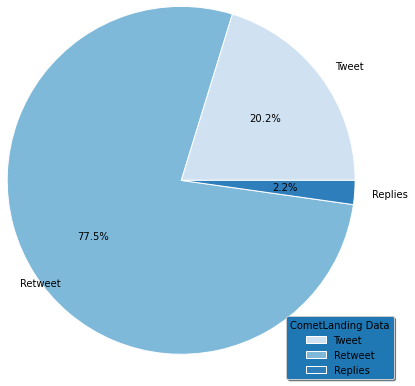

In [211]:
# https://matplotlib.org/stable/plot_types/stats/pie.html#sphx-glr-plot-types-stats-pie-py
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

# data
x = [len(tweet_only_df), len(retweet_only_df), len(raw_total_replies_df)]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(3, 3), labels=["Tweet", "Retweet", "Replies"],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
       autopct="%1.1f%%")

legend = ax.legend(loc='best', bbox_to_anchor=(1, -0.6, 0.5, 0.5),
                   shadow=True, fontsize='medium', title="CometLanding Data")


# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()


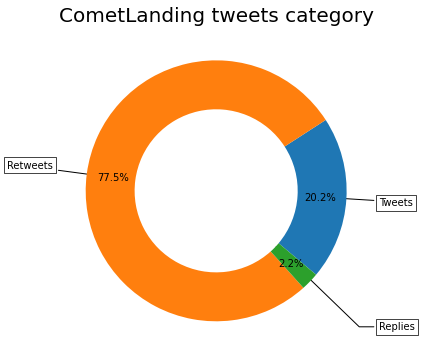

In [212]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = ["Tweets",
         "Retweets",
         "Replies"]

data = [len(tweet_only_df), len(retweet_only_df), len(raw_total_replies_df)]

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%", pctdistance=0.8,
                                  radius=2, center=(0, 0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("CometLanding tweets category", y=1.5,
             fontdict={"fontsize": 20})

plt.show()


In [213]:
date_raw = df[df['created_at'].apply(
    lambda x: True if re.search('^2014-11-12', str(x)) else False)]


In [214]:
date_raw


,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications
4056,532671396942344192,2553_3,RT @T4914T: Touchdown! My new address: 67P! #C...,2014-11-12 23:08:52+00:00,NaN,en,NaN,NaN,2881297946,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5272435722...,19,30,http://twitter.com/2553_3/statuses/53267139694...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
4057,532671395827048448,Tim_A_Roberts,Fuck you #CometLanding ...I've just landed on ...,2014-11-12 23:08:51+00:00,NaN,en,NaN,NaN,22677215,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5299272572...,2558,2056,http://twitter.com/Tim_A_Roberts/statuses/5326...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter
4058,532671394757103617,ies59192,#CometLanding which is better pokerstars or fu...,2014-11-12 23:08:51+00:00,NaN,zh-cn,NaN,NaN,2594606664,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://abs.twimg.com/sticky/default_profile_im...,31,22,http://twitter.com/ies59192/statuses/532671394...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
4059,532671392815542273,santaleman,"RT @esa: ""Maybe today we didn't just land once...",2014-11-12 23:08:51+00:00,NaN,es,NaN,NaN,302594916,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1630988192...,625,839,http://twitter.com/santaleman/statuses/5326713...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter Web Client,Twitter
4060,532671387790757888,miarmc,Pink Floyd-ish RT â€œ@mashable: Listen to the ...,2014-11-12 23:08:50+00:00,NaN,en,972651,mashable,77091766,532579352094195000,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/5262001082...,4096,4279,http://twitter.com/miarmc/statuses/53267138779...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter


In [215]:
date = date_raw.set_index('created_at').groupby(pd.Grouper(freq='H'))


In [216]:
date.count()["id_str"]


created_at
2014-11-12 09:00:00+00:00    9819
2014-11-12 10:00:00+00:00    5240
2014-11-12 11:00:00+00:00    5827
2014-11-12 12:00:00+00:00    6362
2014-11-12 13:00:00+00:00    5159
2014-11-12 14:00:00+00:00    2103
2014-11-12 15:00:00+00:00    5715
2014-11-12 16:00:00+00:00    5915
2014-11-12 17:00:00+00:00    5910
2014-11-12 18:00:00+00:00    5903
2014-11-12 19:00:00+00:00    3529
2014-11-12 20:00:00+00:00    3776
2014-11-12 21:00:00+00:00    2116
2014-11-12 22:00:00+00:00    4508
2014-11-12 23:00:00+00:00    1369
Freq: H, Name: id_str, dtype: int64

In [217]:
date_labels = [str(ts.strftime("%H"))
               for ts in date.count()["id_str"].index.tolist()]


In [218]:
date_data = date.count()["id_str"].tolist()


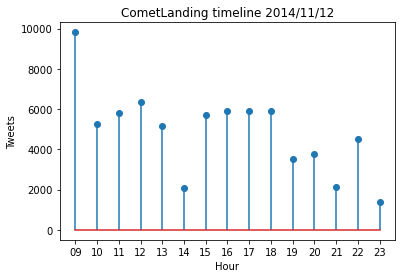

In [219]:
y = date_data
x = date_labels

plt.title("CometLanding timeline 2014/11/12")
plt.xlabel("Hour")
plt.ylabel("Tweets")

plt.stem(x, y)
plt.show()


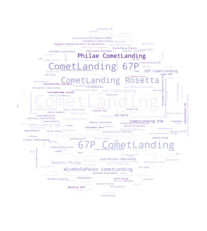

In [220]:
def createWordCloud(allHashtags):
    mask = np.array(Image.open('../moon.jpg'))
    text = " ".join(x.split()[0] for x in allHashtags)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 12000,
                          height = 9000,
                          #max_words = 200,
                          colormap = 'Purples',
                          mask = mask,
                          background_color = 'white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file('../images/wordCloud.png')

# Not sure if CometLanding hashtag should be in cloud but it can be searched for in the file and removed before creating wordcloud.
# Example usage
createWordCloud(getListOfAllHashTags())


In [70]:
df['applications'].unique()

array(['Twitter', 'IFTTT', 'Buffer', 'TweetDeck', 'AllFilmBot',
       'Tweetbot for Mac', 'Gwittr Writer', 'dlvr.it', 'Hootsuite',
       'GatorBot', 'Mobile Web (M5)', 'Tweetbot for iÎŸS', 'Instagram',
       'my-app-z', 'Mobile Web (M2)', 'HubSpot', 'TweetAdder v4',
       'Echofon', 'OS X', 'Google', 'TweetCaster for Android',
       'Carbon for Android', 'Dat post', '423Diotima', 'iOS', 'Flipboard',
       'PlumeÂ\xa0forÂ\xa0Android', 'botly', 'MetroTwit', 'YoruFukurou',
       'Favstar.FM', 'RNAutoRetweet', ' Tweedle', 'Sprout Social',
       'RoundTeam', 'ScienceApp', 'Crowdbooster', 'SocialChorus',
       'Tweetium for Windows', 'twicca', 'SemanticEarth',
       'Twidere for Android #2', 'Microsoft SMB', 'Facebook',
       'TheWorld for iOS', 'Tumblr', 'feedly cloud', 'TTYtter', 'Polly',
       'twittbot.net', 'Tweetings for Android', 'twi_api_for_farm',
       'Post with Klout', 'Tweetian for Sailfish OS', 'yoono', 'Seesmic',
       'BBotMaker - Bot Ã\xa0 mots-clÃ©s', 'Choqok'

In [71]:
spec_app_raw = df.groupby(["specific_applications"]).agg(["count"])["id_str"]
app_raw = df.groupby(["applications"]).agg(["count"])["id_str"]

In [72]:
spec_app_sorted = spec_app_raw.sort_values(by="count",ascending=False)
app_sorted = app_raw.sort_values(by="count",ascending=False)

In [73]:
spec_app_raw

,count
specific_applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [74]:
spec_app_sorted

,count
specific_applications,
Twitter Web Client,27943
Twitter for iPhone,13750
Twitter for Android,12773
TweetDeck,4081
Twitter for iPad,3283
...,...
Tweet Offers,1
Tweet-this-page,1
MalelErkin,1


In [75]:
app_raw

,count
applications,
Tweedle,37
#Futures,6
(MO) I-70 Updates,1
(TX) I-35E Updates,1
(TX) I-35W Updates,1
...,...
ãƒˆãƒ¬ãƒ³ãƒ‰è§£æžã‚·ã‚¹ãƒ†ãƒ,2
ãƒ„ã‚¤ã‚¿ãƒž,1
ãƒ„ã‚¤ã‚¿ãƒž for Android,9


In [76]:
app_sorted

,count
applications,
Twitter,62860
TweetDeck,4081
dlvr.it,1671
Tweetbot for iÎŸS,1055
Tweet Old Post,925
...,...
LF_ShindongSJd app,1
KuroTwi,1
KunzBot,1


In [77]:
top6_withdev = spec_app_sorted.head(6)["count"]
top6_app = app_sorted.head(6)["count"]

In [78]:
others_count = spec_app_sorted.sum() - spec_app_sorted.head(6).sum()
others_dict = {"Others": others_count[0]}
others = pd.Series(data=others_dict)
top7_withdev = pd.concat([top6_withdev, others])

In [79]:
others_count_app = app_sorted.sum() - app_sorted.head(6).sum()
others_dict_app = {"Others": others_count_app[0]}
others_app = pd.Series(data=others_dict_app)
top7_app = pd.concat([top6_app, others_app])

In [80]:
top7_withdev

Twitter Web Client     27943
Twitter for iPhone     13750
Twitter for Android    12773
TweetDeck               4081
Twitter for iPad        3283
dlvr.it                 1671
Others                 13806
dtype: int64

In [81]:
top7_app

Twitter              62860
TweetDeck             4081
dlvr.it               1671
Tweetbot for iÎŸS     1055
Tweet Old Post         925
Hootsuite              799
Others                5916
dtype: int64

In [82]:
others_count_app

count    5916
dtype: int64

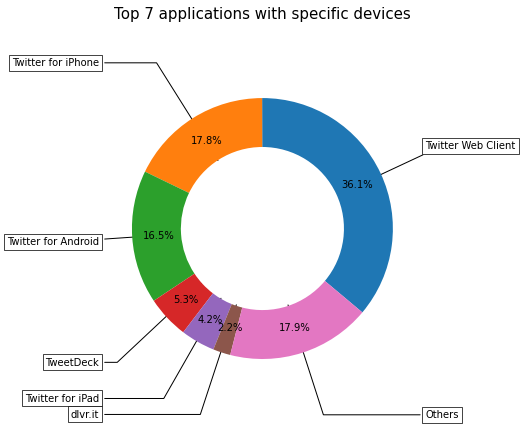

In [83]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = top7_withdev.keys().tolist()

data = top7_withdev.values.tolist()

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%",pctdistance=0.8, 
                                  radius=2, center=(0,0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 7 applications with specific devices",y=1.75,
             fontdict = {"fontsize":15})

plt.show()

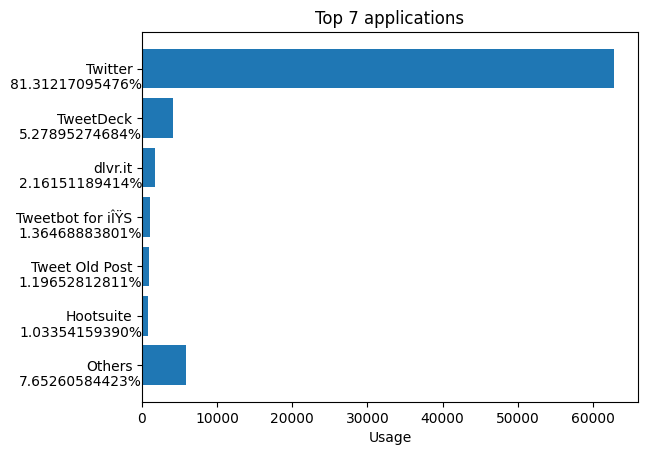

In [88]:
# https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib

label = top7_app.keys().tolist()

data = top7_app.values.tolist()


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = label
ax.barh(y_pos, data, align='center')
ax.set_yticks(y_pos, labels=label)
ax.invert_yaxis()  
ax.set_xlabel('Usage')
ax.set_title('Top 7 applications')

total = df["applications"].size

#Percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    percentage = '{:.11f}%'.format(100*p.get_width()/total)
    x, y = p.get_xy() 
    ax.annotate(percentage, (x, y + height*1.02), ha='right')


plt.show()

In [85]:
df["applications"].size

77307